# Birds Classification, data taken from Kaggle(450 species of birds)
### Downloading and organising our data
Here we will first set our kaggle API with colab and download the whole data to Google Colab.
Then we will unzip the data because the default download directly to colab will be zipped in a single file.
Then we will organise of data in their respective directories which will be train, valid and test.

This is the first stage of our roadmap to build an image classifier.

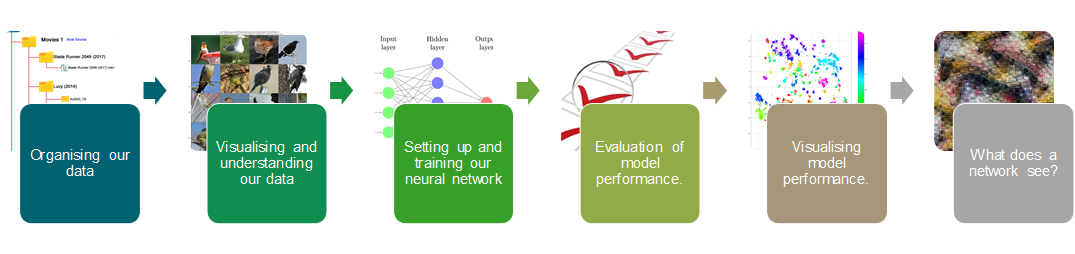

In [ ]:
!pip install kaggle  # install a kaggle library

In [8]:
!mkdir ~/.kaggle # make a directory named kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!cp kaggle.json ~/.kaggle/  # copy the json file into this directory 

In [10]:
!chmod 600 ~/.kaggle/kaggle.json  # required permission for the file

In [ ]:
!kaggle datasets download gpiosenka/100-bird-species  # downloading the whole dataset to our colab notebook

In [ ]:
!unzip 100-bird-species.zip  ## to unzip our data

In [13]:
!nvidia-smi  # to check which GPU was assigned to us.

Tue Dec 27 09:20:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
import tensorflow as tf
tf.__version__
import numpy as np

# for directory manipulation and randomization
import random
import os
import pathlib

# data loading
from keras.preprocessing.image import ImageDataGenerator

# Model
from keras.models import Sequential, load_model
from keras.layers import Dense



In [15]:
tf.test.gpu_device_name()
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


### Visualization the Data and Class Sampling
Here we will have a closer look at data and see the number of classes.
We will visualize some random images to have a look at the images we are dealing with.
We will see how many images every class has in all the data directories.
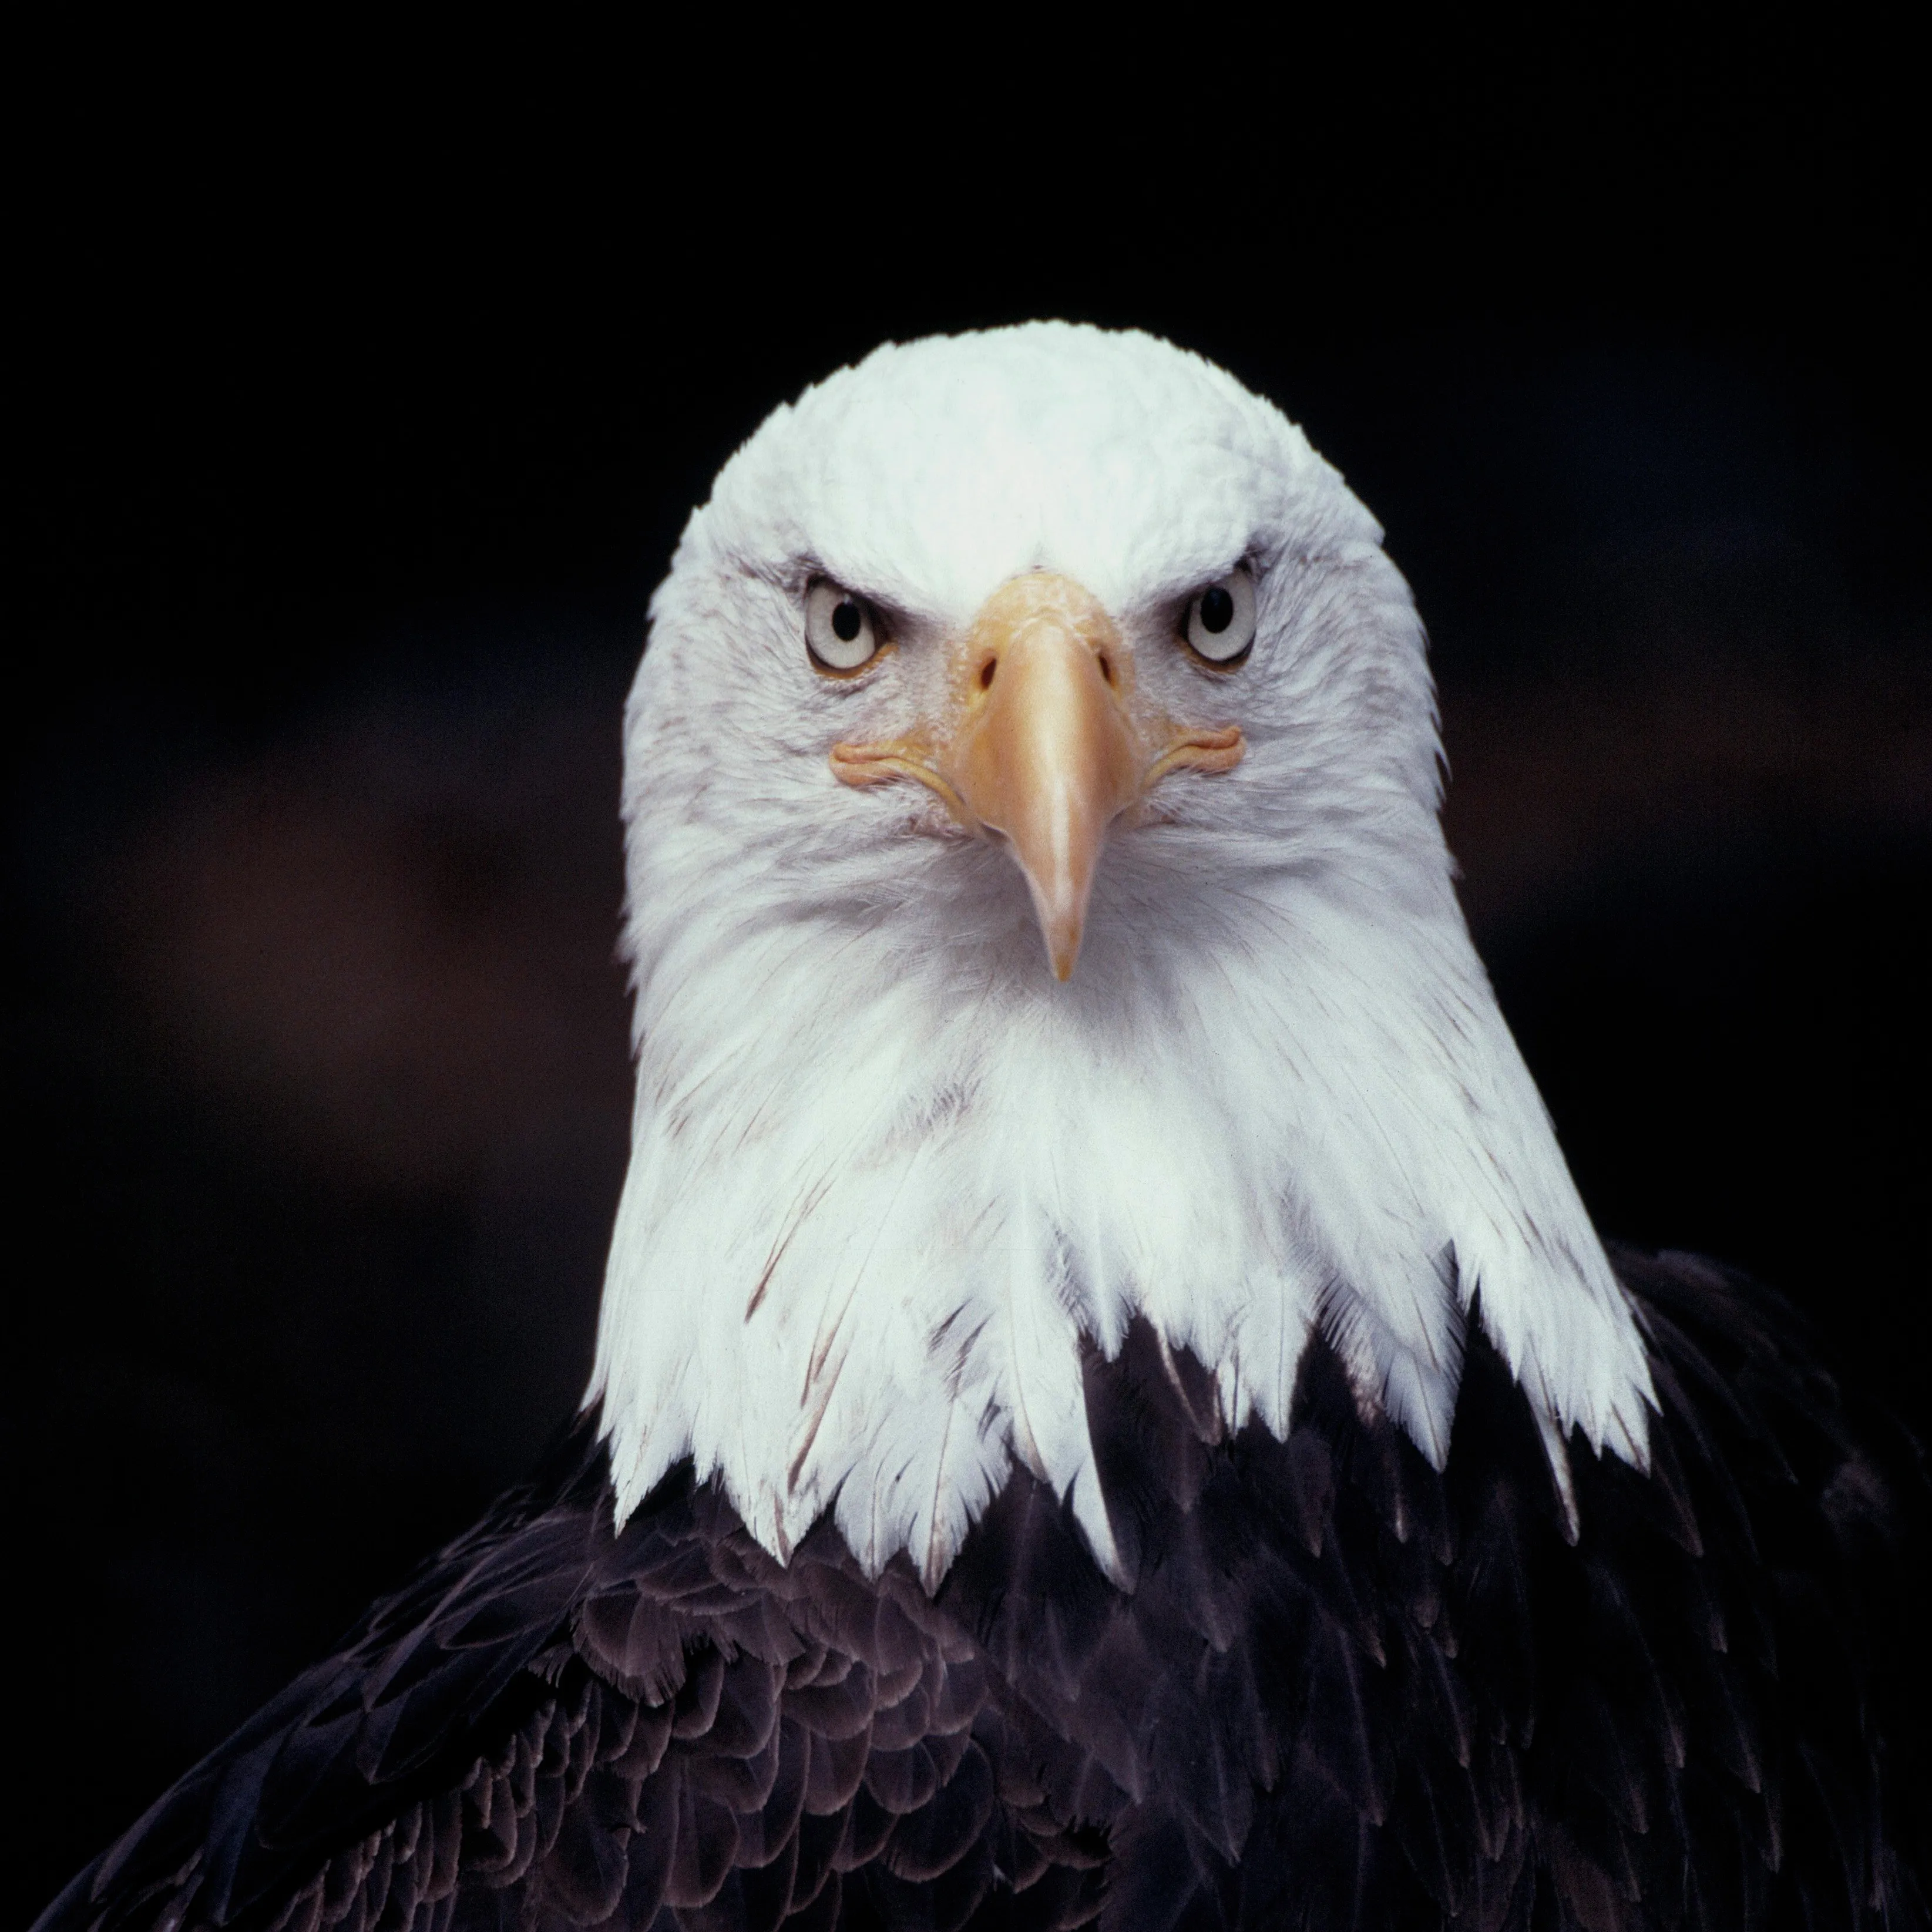

In [107]:
train_directory = pathlib.Path("/content/birds_dataset/train")
Bclasses = np.array(sorted([item.name for item in train_directory.glob("*")]))
print(f" Total number of classes in dataset are: {len(Bclasses)} \nClass : {Bclasses}")


 Total number of classes in dataset are: 450 
Class : ['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'ALBATROSS'
 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT'
 'AZARAS SPINETAIL' 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER'
 'AZURE TIT' 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'B

#### Checking the Birds species with the number of images for each species for our train, valid and test images.
We will have visual presentation of class distribution in all 3 directories.


In [ ]:
!pip install kaleido
# def species(dir_path):
#     '''This function will take directory as input and prints the birds species with number of images'''
#     total = 0
#     classes = os.listdir(dir_path)
#     for name in classes:
#         birds = os.path.join(dir_path + '/' + name)
#         image = os.listdir(birds)
#         print(f'The number of images of species {name} is {len(image)}')
#         total += len(image)
#     print(f'Total number of images in this directory is {total}')

In [25]:
class_distribution = [len(os.listdir(("/content/birds_dataset/train") + f"/{name}")) for name in Bclasses]

In [26]:
import plotly.express as px
fig = px.bar(y= Bclasses, x = class_distribution, title = "Training Class Distribution", height = 1500, color = Bclasses)
fig.update_layout({'title': {'x': 0.5}})
fig.show()

In [27]:
Average_images_train = int(np.mean(class_distribution))
print(f"average images per class in train is : {Average_images_train}")

average images per class in train is : 156


In [28]:
# calculation class_distribution for test
class_distribution = [len(os.listdir(("/content/birds_dataset/test") +"/" + f"{name}")) for name in Bclasses]

fig = px.bar(y=Bclasses, x= class_distribution, title = "Test class distribution", height= 1500, color = Bclasses)
fig.update_layout({'title': {'x': 0.5}})
fig.show()                          

For test data number of images per class is same i.e. is 5. Now lets have a look at Valid data.


In [29]:
# class distribution for valid data
class_distribution = [len(os.listdir(("/content/birds_dataset/valid") + "/" + f"{name}")) for name in Bclasses]

# plotting the distribution

fig = px.bar(y = Bclasses, x = class_distribution, title = "Validation class distribution", height = 1500, color = Bclasses)
fig.update_layout({"title":{'x': 0.5}})
fig.show()

Here upon looking at the data we can say that Data has 450 different species of birds. Every species has minimum 130 images and maximum 248 images. 
That is around 151 images average for each species in train.
Validation and Test data has 5 image each.
Total number of images for Train data is 70626.
Total number of images for Test data is 2250.
Total number of images for Valid data is 2250.


## Image Visualization
Here we will have a look at our images which will be random selection of images

In [30]:
import matplotlib.pyplot as plt
def img_preview(dir, tar_species):
  folder = os.path.join(dir + '/' + tar_species)  # target images
  random_img = random.sample(os.listdir(folder), 1)  # selecting the random image
  # print(random_img)
  
  img = plt.imread(folder + '/' + random_img[0])
  #print(img.shape)
  plt.imshow(img)
  plt.legend(tar_species)
  plt.axis("off")
  return img

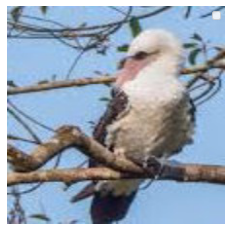

In [31]:
view_img = img_preview("/content/birds_dataset/train", "ABBOTTS BOOBY")


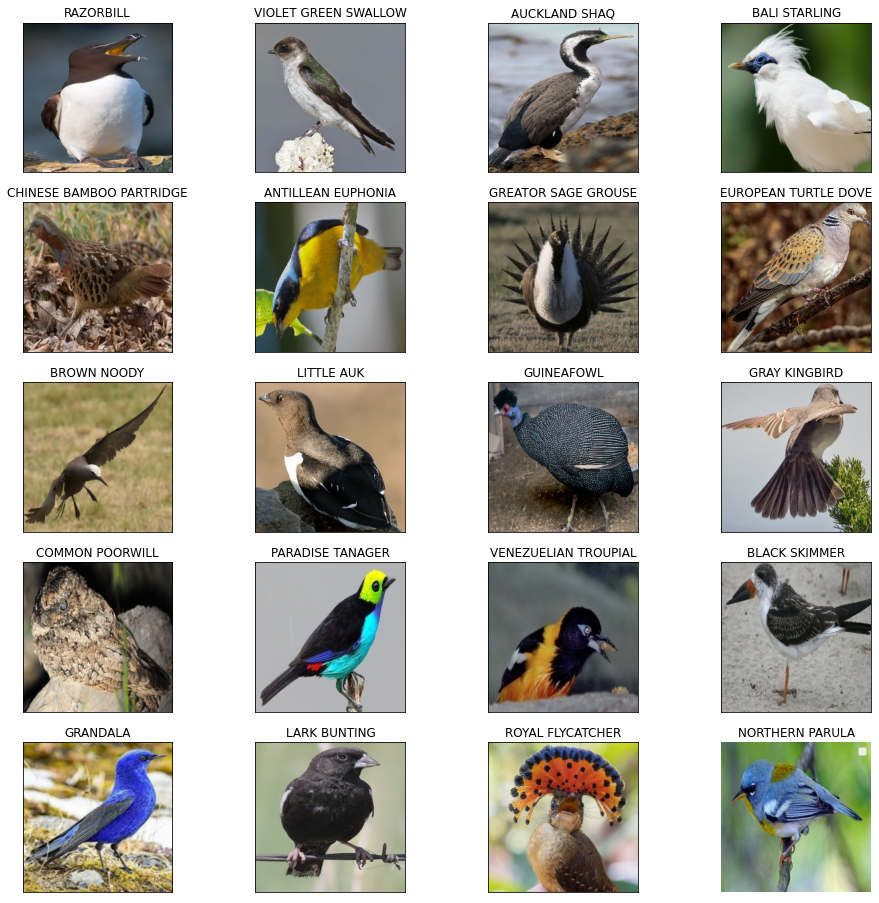

In [34]:
## here we will have a look at some random images
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (16, 16),
                          subplot_kw = {'xticks': [], 'yticks': []})
rand_ind = np.random.randint(0, len(Bclasses), 20)

for i , ax in enumerate(axes.flat):
  ax.imshow(img_preview("/content/birds_dataset/train", Bclasses[rand_ind[i]]))
  ax.set_title(Bclasses[rand_ind[i]])

All the birds are so diverse and model has to understand the core features for each class. Problem is that we don't have many images in each class for model to learn all that core features so we will be using the pretrained model which is already trained on million of images and try to fine tune that model according to our needs. 

# Transfer learning 
As each species of birds don't have the right amount of images for model to fully grasp the features that are needed to correctly predict the class of a bird. So we will use the pretrained models. The First we will try is VGG16 trained on millions of images on Imagenet dataset.


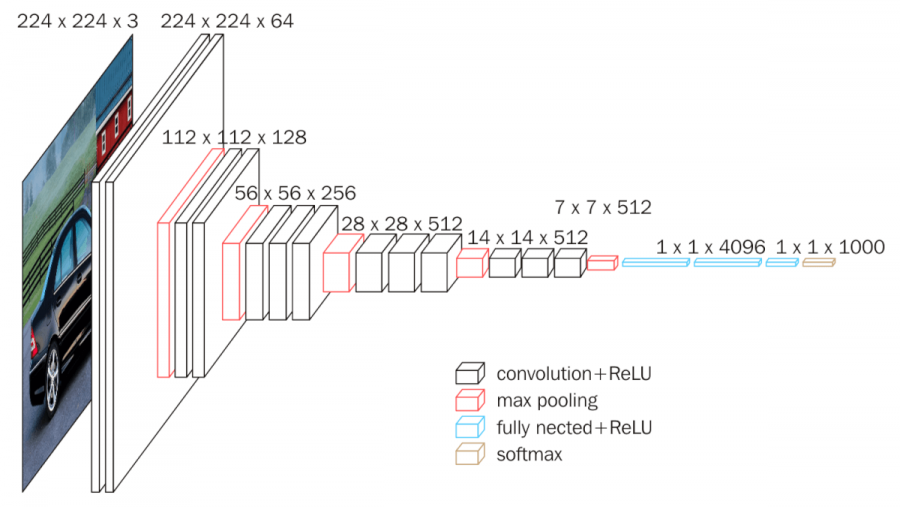

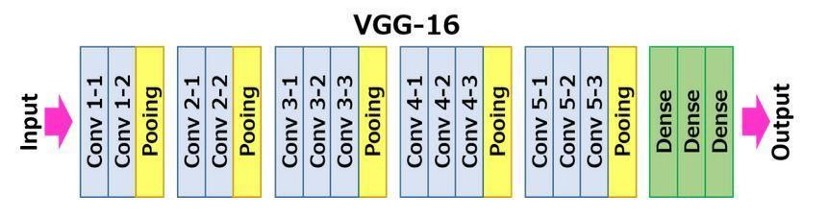

### What is VGG16
A convolutional neural network is also known as a ConvNet, which is a kind of artificial neural network. A convolutional neural network has an input layer, an output layer, and various hidden layers. VGG16 is a type of CNN (Convolutional Neural Network) that is considered to be one of the best computer vision models to date. The creators of this model evaluated the networks and increased the depth using an architecture with very small (3 × 3) convolution filters, which showed a significant improvement on the prior-art configurations. They pushed the depth to 16–19 weight layers making it approx — 138 trainable parameters.

In [35]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

base_model.summary()  # to have a look at our model 

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

As we can see from our downloaded model above we don't have the top and last layer of the model, it is because it was made to classify for 1000 classes. Now what we will do is freeze our model so that we will not lose the important information it has on the previous million images training.

In [36]:
base_model.trainable = False  # Freezing our base model

In [37]:
from tensorflow import keras
inputs = keras.layers.Input(shape = (224,224,3))
x = base_model(inputs)  # passing inputs to the model
x = keras.layers.GlobalAveragePooling2D()(x)  # Average pooling the outputs of the model
outputs = keras.layers.Dense(len(Bclasses), activation = 'softmax')(x) # creating the output of our model

model = keras.Model(inputs, outputs)  # combining the inputs and outputs through the model

In [38]:
# compiling the model
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [39]:
# specifying our directories
train_dir = "/content/birds_dataset/train"
valid_dir = "/content/birds_dataset/valid"
test_dir = "/content/birds_dataset/test"

## Data Loading with Image Data Generator

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# preprocessing our data scaling and normaliztion.

train_gen = ImageDataGenerator(rescale = 1./255)
valid_gen = ImageDataGenerator(rescale = 1./255)
test_gen = ImageDataGenerator(rescale = 1./255)

train_data = train_gen.flow_from_directory(train_dir, 
                                          batch_size = 32,
                                          target_size = (224,224),
                                          class_mode = 'categorical',
                                          shuffle = True)

valid_data = valid_gen.flow_from_directory(valid_dir, 
                                          batch_size = 32,
                                          target_size = (224,224),
                                          class_mode = 'categorical',
                                          shuffle = True)
test_data = test_gen.flow_from_directory(test_dir,
                                         batch_size = 32,
                                         target_size = (224,224),
                                         class_mode = 'categorical',
                                         shuffle = False)

Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


In [41]:
model.summary()  # lets see our input and output layer that we defined above.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 450)               230850    
                                                                 
Total params: 14,945,538
Trainable params: 230,850
Non-trainable params: 14,714,688
_________________________________________________________________


### Training the model for 10 epochs
Key parts of model:

1. Model itself is a VGG16 model with pretrained weights from Imagenet training and output layer of 450 classes
2. loss - is objection function(categorical_crossentroy) we use to help measure how well our model is performing .
3. optimiser - the algorithm we use to optimise the model cofficients by iteratively exploring solution space. In our case we're using ADAM optimiser.
4. dataloaders - The iterative functions which control the loading and transforming of the input images of each mini-batch into the network during training and validation steps.

In [42]:
# seems everything is right and lets mode and train the model
history = model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = valid_data,
          validation_steps = int(0.25*(len(valid_data))))

Epoch 1/10
2208/2208 [==============================] - 364s 160ms/step - loss: 5.1505 - accuracy: 0.1368 - val_loss: 4.2864 - val_accuracy: 0.3143
Epoch 2/10
2208/2208 [==============================] - 362s 164ms/step - loss: 3.9421 - accuracy: 0.3323 - val_loss: 3.4353 - val_accuracy: 0.4430
Epoch 3/10
2208/2208 [==============================] - 362s 164ms/step - loss: 3.3077 - accuracy: 0.4263 - val_loss: 2.8003 - val_accuracy: 0.5276
Epoch 4/10
2208/2208 [==============================] - 363s 164ms/step - loss: 2.8999 - accuracy: 0.4857 - val_loss: 2.6056 - val_accuracy: 0.4963
Epoch 5/10
2208/2208 [==============================] - 362s 164ms/step - loss: 2.6095 - accuracy: 0.5267 - val_loss: 2.2955 - val_accuracy: 0.5754
Epoch 6/10
2208/2208 [==============================] - 362s 164ms/step - loss: 2.3904 - accuracy: 0.5581 - val_loss: 2.1175 - val_accuracy: 0.6011
Epoch 7/10
2208/2208 [==============================] - 362s 164ms/step - loss: 2.2166 - accuracy: 0.5866 - val_

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 450)               230850    
                                                                 
Total params: 14,945,538
Trainable params: 230,850
Non-trainable params: 14,714,688
_________________________________________________________________


### Evaluating our base_model performance
Here we will evaluation the model performace of our base_model with no training of VGG16 layers.

In [44]:
results = model.evaluate(test_data)
results

71/71 [==============================] - 12s 162ms/step - loss: 1.5409 - accuracy: 0.7053


[1.5408793687820435, 0.7053333520889282]

After evaluation on the test data which our model has not see yet. We got the accuracy of around 70 percent. which is not that satisfactory given the fact that our test data is only 5 images per class. Just using 5 images per class is not a satisfactory answer.

### Plotting loss and Accuracy with epochs.

In [45]:
def vis_plot(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.plot("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()
    plt.tight_layout()

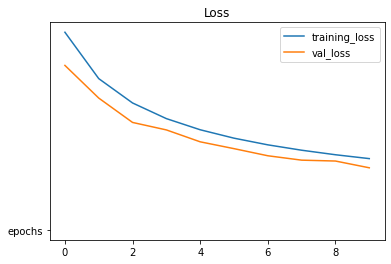

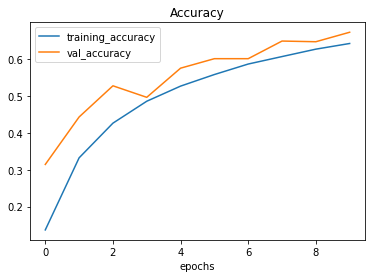

<Figure size 432x288 with 0 Axes>

In [46]:
vis_plot(history)

## Fine tuning our model
Now that the new layers of the model are trained, we have the option to apply a final trick to improve the model, called [fine-tuning](https://developers.google.com/machine-learning/glossary#f). To do this we unfreeze the entire model, and train it again with a very small [learning rate](https://developers.google.com/machine-learning/glossary#learning-rate). This will cause the base pre-trained layers to take very small steps and adjust slightly, improving the model by a small amount.  

Note that it is important to only do this step after the model with frozen layers has been fully trained. The untrained pooling and classification layers that we added to the model earlier were randomly initialized. This means they needed to be updated quite a lot to correctly classify the images. Through the process of [backpropagation](https://developers.google.com/machine-learning/glossary#backpropagation), large initial updates in the last layers would have caused potentially large updates in the pre-trained layers as well. These updates would have destroyed those important pre-trained features. However, now that those final layers are trained and have converged, any updates to the model as a whole will be much smaller (especially with a very small learning rate) and will not destroy the features of the earlier layers.

We will unfreeze our model and set our final 5 layers to be trainable and rest all to be false. So we will be retraining our final 5 layers.

In [47]:
model.layers

In [48]:
for layer in model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f218ad20ca0> True
<keras.engine.functional.Functional object at 0x7f218abae790> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f218ad20e20> True
<keras.layers.core.dense.Dense object at 0x7f218ad20b50> True


In [49]:
for i, layer in enumerate(model.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [50]:
base_model.trainable = True  # let's unfreeze our base model and retrain our last 5 layers  

In [51]:
for layer in base_model.layers[:-5]:
  layer.trainable = False

### compiling the fine_tuning model
Here we define our performace matrice which we will use categorical crossentropy as our loss and ADAM as our optimizer with learning rate of 0.0001 and our metric will be Accuracy.


In [52]:
model.compile(loss = keras.losses.CategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(learning_rate= 0.0001),
              metrics = ["accuracy"])

In [53]:
# let's check which layers are trainable
for i, layer in enumerate(model.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [54]:
print(len(model.trainable_variables))

8


In [65]:
initial_epochs = 10

# Fine Tuning For Another 5 Epochs
fine_tune_epochs = initial_epochs + 5

# Refitting The Model
history_fine_tuned = model.fit(train_data,
                                 epochs=fine_tune_epochs,
                                 validation_data=valid_data,
                                 validation_steps=int(0.25 * len(valid_data)),
                                 initial_epoch=history.epoch[-1])

Epoch 10/15
2208/2208 [==============================] - 397s 180ms/step - loss: 0.0842 - accuracy: 0.9741 - val_loss: 0.4207 - val_accuracy: 0.9044
Epoch 11/15
2208/2208 [==============================] - 407s 184ms/step - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.4406 - val_accuracy: 0.8971
Epoch 12/15
2208/2208 [==============================] - 407s 184ms/step - loss: 0.0627 - accuracy: 0.9808 - val_loss: 0.4308 - val_accuracy: 0.9118
Epoch 13/15
2208/2208 [==============================] - 407s 184ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.4843 - val_accuracy: 0.9136
Epoch 14/15
2208/2208 [==============================] - 407s 184ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.5618 - val_accuracy: 0.9118
Epoch 15/15
2208/2208 [==============================] - 407s 184ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.4875 - val_accuracy: 0.9099


In [67]:
results_ft = model.evaluate(test_data)

71/71 [==============================] - 11s 148ms/step - loss: 0.3233 - accuracy: 0.9329


With fine tuning we were able to achieve the accuracy of around 97 percent just with training 5 more epochs also our validation accuracy ame out to be 92 percent


### Evaluate the fine tuned model performance
We evaluated our fine tuned model performace which came out to be 93 percent which is best according the to the data we had and 

In [112]:
#model = tf.keras.models.load_model('fine_tune_vgg_mode.h5')
fine_tune_results = model.evaluate(test_data)
fine_tune_results

71/71 [==============================] - 11s 153ms/step - loss: 0.3233 - accuracy: 0.9329


[0.32329651713371277, 0.9328888654708862]

### saving the fine_tuned model in directory

In [56]:
model.save('fine_tuned_final.h5')

# visualizing the loss and accuracy for base model and fine tuned model.


In [69]:
def compare_history(org_history, new_history, intial_epochs = 10):
  """compare 2 tensorflow history objects"""
  acc = org_history.history['accuracy']
  loss = org_history.history['loss']
  val_acc = org_history.history['val_accuracy']
  val_loss = org_history.history['val_loss']

  # combining old and new history metrics
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']
  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # plots for accuracy
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = 'Start fine tuning')
  plt.legend(loc = 'lower right')
  plt.title("training and validation accuracy")

  # plots for loss

  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = 'Start fine tuning')
  plt.legend(loc = 'upper right')
  plt.title("training and validation loss")




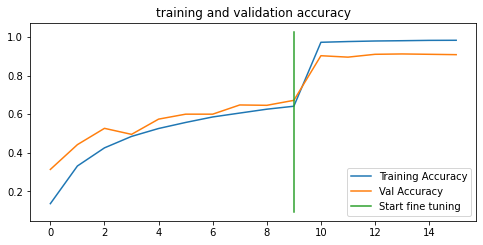

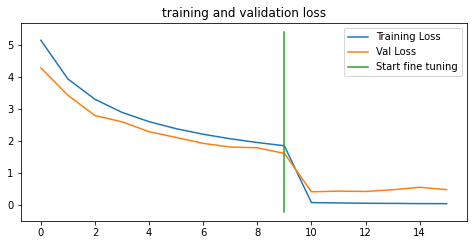

In [70]:
compare_history(history, history_fine_tuned)

In [113]:
# predicting the test set
# we will use np.argmax to use our most probable prediction.
pred = model.predict(test_data)
pred = np.argmax(pred, axis =1)

71/71 [==============================] - 12s 164ms/step


### Checking our prediction on a random Index

True label : AFRICAN PIED HORNBILL
Predicted label is: AFRICAN PIED HORNBILL


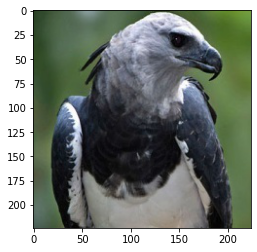

In [114]:
import matplotlib.pyplot as plt
ind = 39
img, label = test_data[ind]
label = test_data.labels[ind]
print(f'True label : {Bclasses[label]}')
print(f'Predicted label is: {Bclasses[pred[ind]]}')
plt.imshow(img[0])
plt.show()

In [73]:
# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['ABBOTTS BABBLER', 'AZARAS SPINETAIL', 'ABBOTTS BABBLER', 'ABBOTTS BABBLER', 'ABBOTTS BABBLER']


## Visualizing our predictions
Here we will randomaly select 20 images and see their predictions.
If image will be correctly prediction it will be in green color.
if it's incorrectly classifiied it will be in red color.

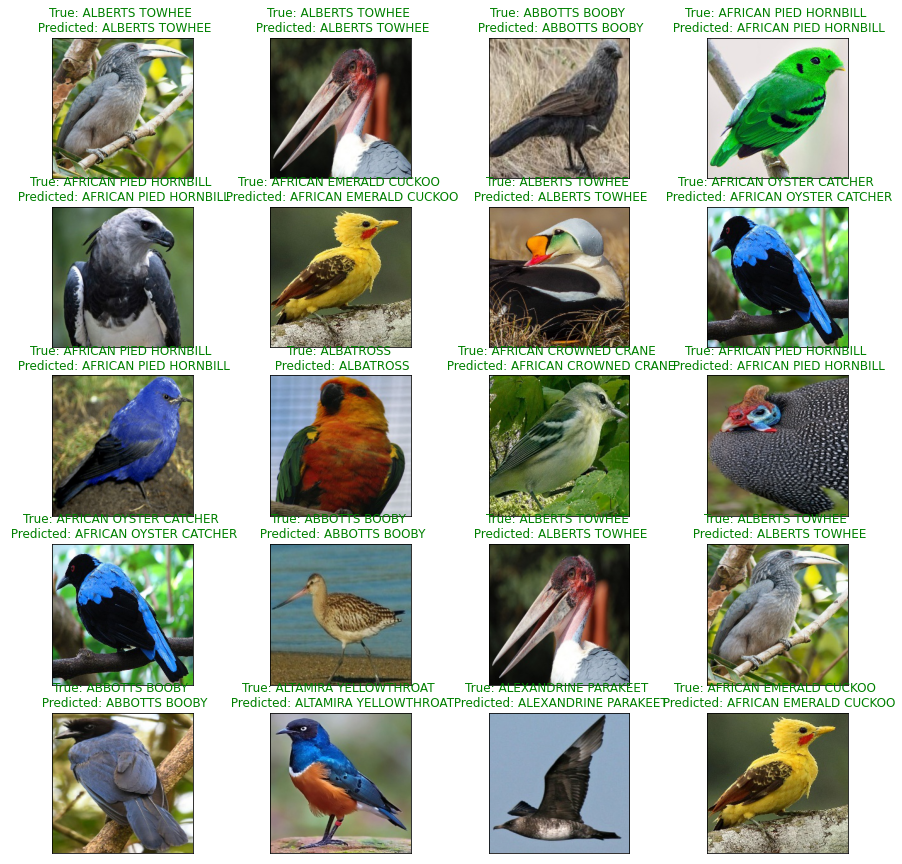

<Figure size 432x288 with 0 Axes>

In [120]:
# Let's display some radon images with their prediction
rand_ind = np.random.randint(0, len(test_data)-1 , 20)
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (15, 15),
                        subplot_kw = {'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  rImg, rLabel = test_data[rand_ind[i]]
  rLabel = int(test_data.labels[rand_ind[i]])
  ax.imshow(rImg[0])
  if Bclasses[rLabel] == Bclasses[pred[rand_ind[i]]]:
    color = "green"
  else:
    color = "red"

  ax.set_title(f"True: {Bclasses[rLabel]} \n Predicted: {Bclasses[pred[rand_ind[i]]]}",
                 color = color)
plt.show()
plt.tight_layout() 

### Precicting the random images
Now we will be predicting the random which are already given to us in directory.

In [121]:
def load_image(file):
  img = tf.io.read_file(file)    # read the image
  img = tf.image.decode_image(img)  # decode an image to the tesor
  img = tf.image.resize(img, size = [224, 224])   # resize the image as per our input
  img = img/255.  # rescale the image
  return img

In [122]:
def make_prediction(file, classname):
  img = load_image(file)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = classname[pred.argmax()]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Prediction; {pred_class}')
  plt.axis(False)


1/1 [==============================] - 1s 990ms/step


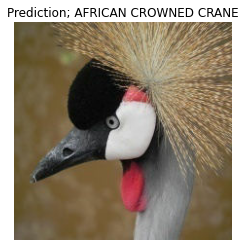

In [125]:
make_prediction("/content/birds_dataset/images to test/2.jpg", Bclasses)

1/1 [==============================] - 0s 18ms/step


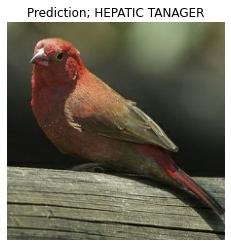

In [129]:
make_prediction("/content/birds_dataset/images to test/firefinch.jpg", Bclasses)

We trained a model which can correctly classify the 450 classes of birds with 93 percent accuracy. We used transfer learning of VGG16 pretrained model and end up making the correct classifier for 450 species of birds.